In [130]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

In [131]:
from spacepy import pycdf
cdf1 = pycdf.CDF('mms1_edp_brst_l2_dce_20170706013953_v3.0.0.cdf')
cdf2 = pycdf.CDF('mms1_edp_brst_l2_dce_20170706014413_v3.0.0.cdf')
print(cdf1)

mms1_edp_bitmask_brst_l2: CDF_UINT2 [1146560]
mms1_edp_dce_dsl_brst_l2: CDF_FLOAT [1146560, 3]
mms1_edp_dce_gse_brst_l2: CDF_FLOAT [1146560, 3]
mms1_edp_dce_par_epar_brst_l2: CDF_FLOAT [1146560, 2]
mms1_edp_deltap_brst_l2: CDF_INT8 [] NRV
mms1_edp_epoch_brst_l2: CDF_TIME_TT2000 [1146560]
mms1_edp_label1_brst_l2: CDF_CHAR*2 [3] NRV
mms1_edp_label2_brst_l2: CDF_CHAR*4 [2] NRV
mms1_edp_label3_brst_l2: CDF_CHAR*12 [2] NRV
mms1_edp_quality_brst_l2: CDF_UINT1 [1146560]
mms1_edp_representation1_brst_l2: CDF_UCHAR*1 [3] NRV
mms1_edp_representation2_brst_l2: CDF_UCHAR*1 [2] NRV


In [38]:
cdf2.keys()

KeysView(<CDF:
mms1_edp_bitmask_brst_l2: CDF_UINT2 [1392640]
mms1_edp_dce_dsl_brst_l2: CDF_FLOAT [1392640, 3]
mms1_edp_dce_gse_brst_l2: CDF_FLOAT [1392640, 3]
mms1_edp_dce_par_epar_brst_l2: CDF_FLOAT [1392640, 2]
mms1_edp_deltap_brst_l2: CDF_INT8 [] NRV
mms1_edp_epoch_brst_l2: CDF_TIME_TT2000 [1392640]
mms1_edp_label1_brst_l2: CDF_CHAR*2 [3] NRV
mms1_edp_label2_brst_l2: CDF_CHAR*4 [2] NRV
mms1_edp_label3_brst_l2: CDF_CHAR*12 [2] NRV
mms1_edp_quality_brst_l2: CDF_UINT1 [1392640]
mms1_edp_representation1_brst_l2: CDF_UCHAR*1 [3] NRV
mms1_edp_representation2_brst_l2: CDF_UCHAR*1 [2] NRV
>)

In [39]:
time_datetime1 = cdf1['mms1_edp_epoch_brst_l2'][:]
time_datetime2 = cdf2['mms1_edp_epoch_brst_l2'][:]

In [40]:
print(time_datetime1[-1])
print(time_datetime2[0])

2017-07-06 01:42:12.998297
2017-07-06 01:44:13.000003


In [41]:
from tqdm.notebook import tqdm

In [42]:
time_h1 = np.array(len(time_datetime1)*[0.000])
time_m1 = np.array(len(time_datetime1)*[0.000])
time_s1 = np.array(len(time_datetime1)*[0.000])
time_ms1 = np.array(len(time_datetime1)*[0.000])

time_h2 = np.array(len(time_datetime2)*[0.000])
time_m2 = np.array(len(time_datetime2)*[0.000])
time_s2 = np.array(len(time_datetime2)*[0.000])
time_ms2 = np.array(len(time_datetime2)*[0.000])


In [43]:
for i in tqdm(range(len(time_datetime1))):
    time_h1[i] = (time_datetime1[i].strftime("%H"))
    time_m1[i] = (time_datetime1[i].strftime("%M"))
    time_s1[i] = (time_datetime1[i].strftime("%S"))
    time_ms1[i] = (time_datetime1[i].strftime("%f"))

for i in tqdm(range(len(time_datetime2))):
    time_h2[i] = (time_datetime2[i].strftime("%H"))
    time_m2[i] = (time_datetime2[i].strftime("%M"))
    time_s2[i] = (time_datetime2[i].strftime("%S"))
    time_ms2[i] = (time_datetime2[i].strftime("%f"))

In [44]:
print(time_ms1)

[ 35633.  35755.  35877. ... 998053. 998175. 998297.]


In [45]:
time_abs1 = time_h1*60*60 + time_m1*60 + time_s1 + 0.000001*time_ms1
time_abs2 = time_h2*60*60 + time_m2*60 + time_s2 + 0.000001*time_ms2
print(time_abs1)

[5993.035633 5993.035755 5993.035877 ... 6132.998053 6132.998175
 6132.998297]


In [46]:
combined_time = np.concatenate((time_abs1 , time_abs2))

time = combined_time - np.array(len(combined_time)*[combined_time[0]])

print(len(time))

2539200


In [47]:
print(len(time))

2539200


In [48]:
print(time[1] - time[0])
print(time[2] - time[1])

0.00012199999946460593
0.00012200000037410064


In [49]:
cadence = 0.000122

In [50]:
E1 = cdf1['mms1_edp_dce_gse_brst_l2'][:]
E2 =  cdf2['mms1_edp_dce_gse_brst_l2'][:]
print((E1))


[[-0.4577675  -0.54380655 -0.8581272 ]
 [-0.45174158 -0.5409809  -0.7673889 ]
 [-0.47328576 -0.55350673 -0.80776113]
 ...
 [-0.22056524  0.34076992 -0.4386262 ]
 [-0.2343048   0.36890063 -0.43928236]
 [-0.2146752   0.3435397  -0.35090452]]


In [51]:
Ex1 = E1[:,0]
Ey1 = E1[:,1]
Ez1 = E1[:,2]

Ex2 = E2[:,0]
Ey2 = E2[:,1]
Ez2 = E2[:,2]

Ex = np.append(Ex1 , Ex2)
Ey = np.append(Ey1 , Ey2)
Ez = np.append(Ez1 , Ez2)

print(Ex1)

[-0.4577675  -0.45174158 -0.47328576 ... -0.22056524 -0.2343048
 -0.2146752 ]


(30.0, 46.0)

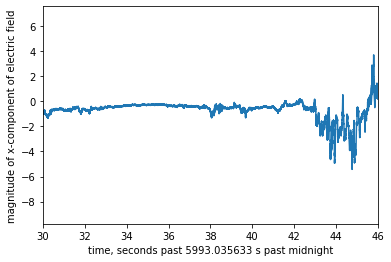

In [129]:
plt.plot(time , Ex)
plt.xlabel("time, seconds past %f s past midnight" %time_abs1[0])
plt.ylabel('magnitude of x-component of electric field')
plt.xlim(30,46)

(30.0, 49.0)

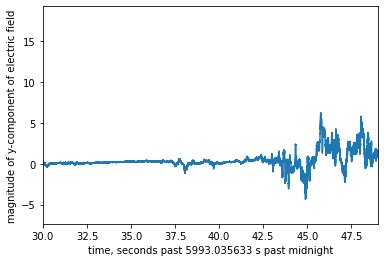

In [54]:
plt.plot(time , Ey)
plt.xlabel("time, seconds past %f s past midnight" %time_abs1[0])
plt.ylabel('magnitude of y-component of electric field')
plt.xlim(30,49)

(30.0, 48.0)

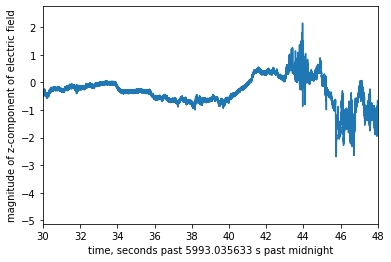

In [55]:
plt.plot(time , Ez)
plt.xlabel("time, seconds past %f s past midnight" %time_abs1[0])
plt.ylabel('magnitude of z-component of electric field')
plt.xlim(30,48)

In [56]:
E_tot = np.sqrt(Ex**2 + Ey**2 + Ez**2)

Text(0, 0.5, 'magnitude of electric field')

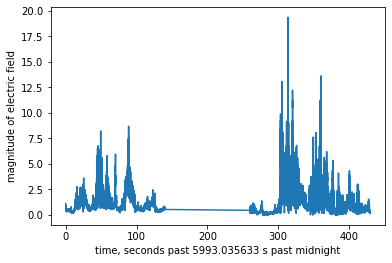

In [132]:
plt.plot(time , E_tot)
plt.xlabel("time, seconds past %f s past midnight" %time_abs1[0])
plt.ylabel('magnitude of electric field')

In [133]:
from scipy.signal import spectrogram

In [134]:
# f , t , Sxx = spectrogram(Ez , fs = 1/cadence)
# plt.pcolormesh(t, f, 10*np.log(Sxx), shading='gouraud')
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.colorbar()
# #plt.clim(-100 , -20)
# plt.show()




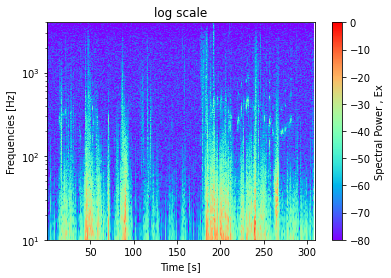

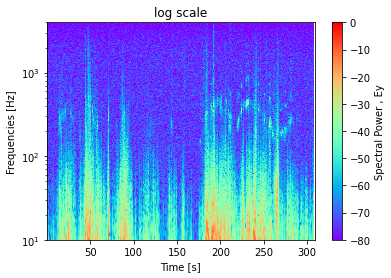

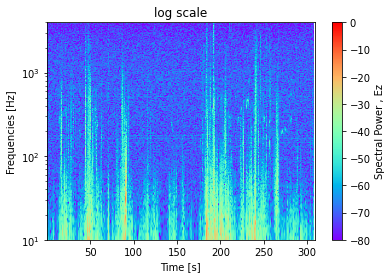

In [135]:
plt.specgram(Ex , Fs = 1/cadence  , cmap = 'rainbow' , NFFT = 8192)
plt.xlabel("Time [s]")
plt.ylabel("Frequencies [Hz]")
plt.yscale('log')
plt.ylim(10,4000)
plt.title('log scale')
plt.colorbar(label = "Spectral Power , Ex")
plt.clim(-80,0)

plt.figure()
plt.specgram(Ey , Fs = 1/cadence , NFFT = 8192 , cmap = 'rainbow')
plt.xlabel("Time [s]")
plt.ylabel("Frequencies [Hz]")
plt.yscale('log')
plt.ylim(10,4000)
plt.title('log scale')
plt.colorbar(label = "Spectral Power , Ey")
plt.clim(-80,0)


plt.figure()
plt.specgram(Ez , Fs = 1/cadence , NFFT = 8192 , cmap = 'rainbow')
plt.xlabel("Time [s]")
plt.ylabel("Frequencies [Hz]")
plt.yscale('log')
plt.ylim(10,4000)
plt.title('log scale')
plt.colorbar(label = "Spectral Power , Ez")
plt.clim(-80,0)


# plt.figure()
# plt.specgram(Ez , Fs = 1/cadence)
# plt.xlabel("Time [s]")
# plt.ylabel("Frequencies [Hz]")
# plt.title('linear scale')
# plt.colorbar(label = "Spectral Power")
# # plt.yscale('log')
# # plt.ylim(40,5*10**3)
# plt.figure()
# plt.specgram(Ey , Fs = 1/cadence)
# plt.xlabel("Time [s]")
# plt.ylabel("Frequencies [Hz]")
# plt.title('linear scale')
# plt.colorbar(label = "Spectral Power")
# # plt.yscale('log')
# # plt.ylim(40,5*10**3)

# plt.figure()
# plt.specgram(Ex , Fs = 1/cadence , cmap = 'rainbow')
# plt.xlabel("Time [s]")
# plt.ylabel("Frequencies [Hz]")
# plt.title('linear scale')
# plt.colorbar(label = "Spectral Power" )
# plt.clim(-100,0)
# # plt.yscale('log')
# # plt.ylim(40,5*10**3)

In [136]:
# plt.figure()
# plt.specgram(Ez , Fs = 1/cadence)
# plt.xlabel("Time [s]")
# plt.ylabel("Frequencies [Hz]")
# plt.title('linear scale')
# plt.colorbar(label = "Spectral Power")
# plt.clim(-60 , -40)
# plt.yscale('log')
# plt.ylim(40,5*10**3)

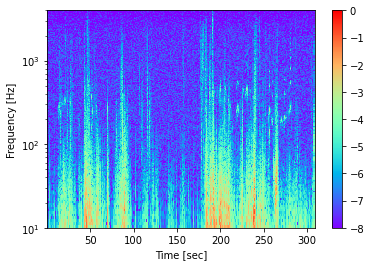

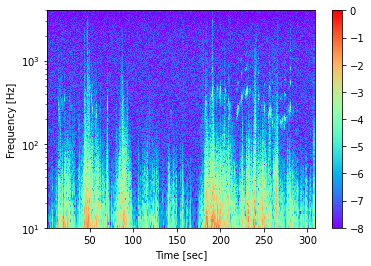

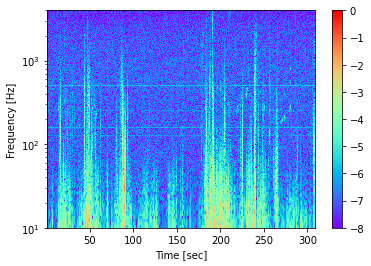

In [137]:
specx , freqx , tx , imx = plt.specgram(Ex , Fs = 1/cadence  , NFFT = 8192)
specy , freqy , ty , imy = plt.specgram(Ey , Fs = 1/cadence  , NFFT = 8192)
specz , freqz , tz , imz = plt.specgram(Ez , Fs = 1/cadence  , NFFT = 8192)

plt.pcolormesh(tx , freqx , np.log10((specx)) , cmap = 'rainbow')
plt.colorbar()
plt.clim(-8 , 0)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.yscale('log')
#plt.xlim(10,95)
plt.ylim(10,4000)
plt.show()

plt.pcolormesh(ty , freqy , np.log10(specy) , cmap = 'rainbow')
plt.colorbar()
plt.clim(-8 , 0)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.yscale('log')
#plt.xlim(10,95)
plt.ylim(10,4000)
plt.show()

plt.pcolormesh(tz , freqz , np.log10(specz) , cmap = 'rainbow')
plt.colorbar()
plt.clim(-8 , 0)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.yscale('log')
#plt.xlim(10,95)
plt.ylim(10,4000)
plt.show()



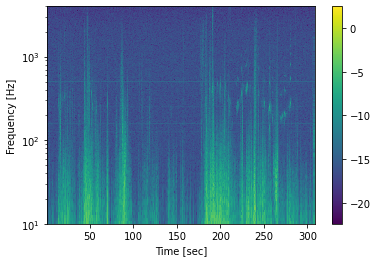

In [63]:
plt.pcolormesh(ty , freqy , np.log((specx+specy+specz)/3))
plt.colorbar()
#plt.clim(-2 , 0)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.yscale('log')
#plt.xlim(10,95)
plt.ylim(10,4000)
plt.show()

In [67]:
spec_omni = (specx + specy + specz)/3

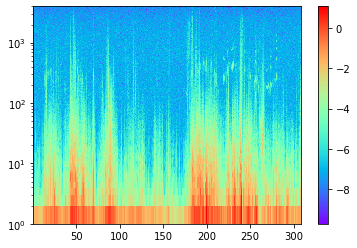

In [68]:
plt.pcolormesh(tx , freqx , np.log10(spec_omni) , cmap = 'rainbow')
plt.yscale('log')
plt.ylim(1,4000)
plt.colorbar()

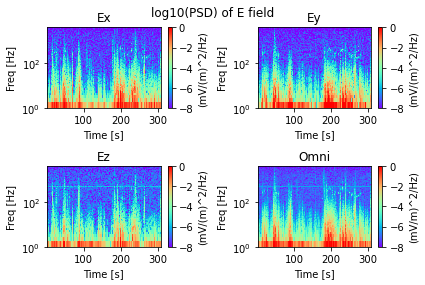

In [69]:
fig , axs = plt.subplots(2,2)
fig.suptitle('log10(PSD) of E field')
img00 = axs[0,0].pcolormesh(tx , freqx , np.log10((specx)) , cmap = 'rainbow')
axs[0,0].set_yscale('log')
axs[0,0].set_ylim(1,4000)
axs[0,0].set_title('Ex')
plt.colorbar(img00 , ax = axs[0,0] , label = "(mV/(m)^2/Hz)")
img00.set_clim(-8,0)


img01 = axs[0,1].pcolormesh(ty , freqy , np.log10(specy) , cmap = 'rainbow')
axs[0,1].set_yscale('log')
axs[0,1].set_ylim(1,4000)
axs[0,1].set_title('Ey')
fig.colorbar(img01 , ax = axs[0,1] , label = "(mV/(m)^2/Hz)")
img01.set_clim(-8,0)


img10 = axs[1,0].pcolormesh(tz , freqz , np.log10(specz) , cmap = 'rainbow')
axs[1,0].set_yscale('log')
axs[1,0].set_ylim(1,4000)
axs[1,0].set_title('Ez')
plt.colorbar(img10 , ax = axs[1,0] , label = "(mV/(m)^2/Hz)")
img10.set_clim(-8,0)


spec_omni = (specx + specy + specz)/3

img11 = axs[1,1].pcolormesh(tx , freqx , np.log10(spec_omni) , cmap = 'rainbow')
axs[1,1].set_yscale('log')
axs[1,1].set_ylim(1,4000)
axs[1,1].set_title('Omni')
plt.colorbar(img11 , ax = axs[1,1] , label = "(mV/m)^2/Hz)")
img11.set_clim(-8,0)

for ax in axs.flat:
    ax.set(xlabel='Time [s]', ylabel='Freq [Hz]')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
    

In [37]:
pip install pycwt

  Created wheel for pycwt: filename=pycwt-0.3.0a22-py3-none-any.whl size=17811 sha256=351dd68065025bc7e508c381dfa2cbebf6c1c8aacab80e7aaed576028ac9a67a
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\79\a5\b0\4de0c4f348ee322a4cef90e046f0ce6cf21e028da682551e34
Successfully built pycwt
Note: you may need to restart the kernel to use updated packages.


In [108]:
import pywt

In [169]:
scales = np.arange(1,10)

In [176]:
coeffs , freqs = pywt.cwt(Ex , scales , 'morl' , sampling_period = cadence)
# power = (abs(coeffs))**2
# db = np.log10(power)

In [177]:
# print(len(freqs))
print(len(time))
print(np.shape(coeffs))
print(len(freqs))

2539200
(9, 2539200)
9


In [178]:
plt.pcolormesh(time , freqs , abs(coeffs)**2 , cmap = 'rainbow')
plt.colorbar()
#plt.clim(-8 , 0)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.yscale('linear')
#plt.xlim(10,95)
#plt.ylim(10,4000)
plt.show()

MemoryError: Unable to allocate 87.2 MiB for an array with shape (9, 2539200) and data type float32

MemoryError: Unable to allocate 21.8 MiB for an array with shape (9, 2539200) and data type bool

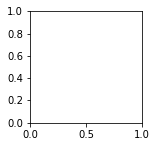

In [174]:
plt.matshow(coeffs)
plt.show()

In [ ]:
>>t = np.linspace(-1, 1, 200, endpoint=False)
>>> sig  = np.cos(2 * np.pi * 7 * t) + np.real(np.exp(-7*(t-0.4)**2)*np.exp(1j*2*np.pi*2*(t-0.4)))
>>> widths = np.arange(1, 31)
>>> cwtmatr, freqs = pywt.cwt(sig, widths, 'mexh')
>>> plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
...            vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())  # doctest: +SKIP
>>> plt.show() # doctest: +SKIP

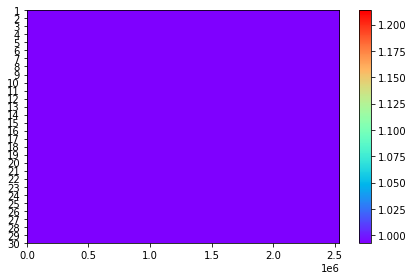

In [121]:
plt.figure();
plt.imshow(db, extent = [0,len(time),30,1] , interpolation = 'bilinear' , cmap = 'rainbow' , aspect = 'auto' , vmax = db.max() , vmin = db.max())
#plt.gca().invert_yaxis()
plt.yticks(np.arange(1,31,1))
#plt.xticks(np.arange(0,201,10))
plt.colorbar()
#plt.clim(0,0.1)
plt.tight_layout()
plt.show()





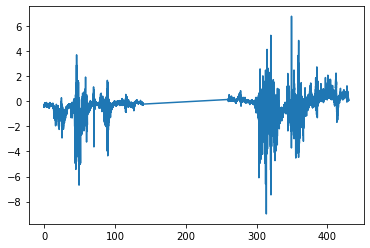

In [77]:
plt.figure()
plt.plot(time , Ex)

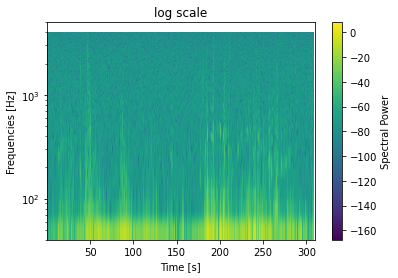

In [96]:
spec , freq  , t , im = plt.specgram(Ey , Fs = 1/cadence)
plt.xlabel("Time [s]")
plt.ylabel("Frequencies [Hz]")
plt.yscale('log')
plt.ylim(40,5*10**3)
plt.title('log scale')
plt.colorbar(label = "Spectral Power")

KeyboardInterrupt: 

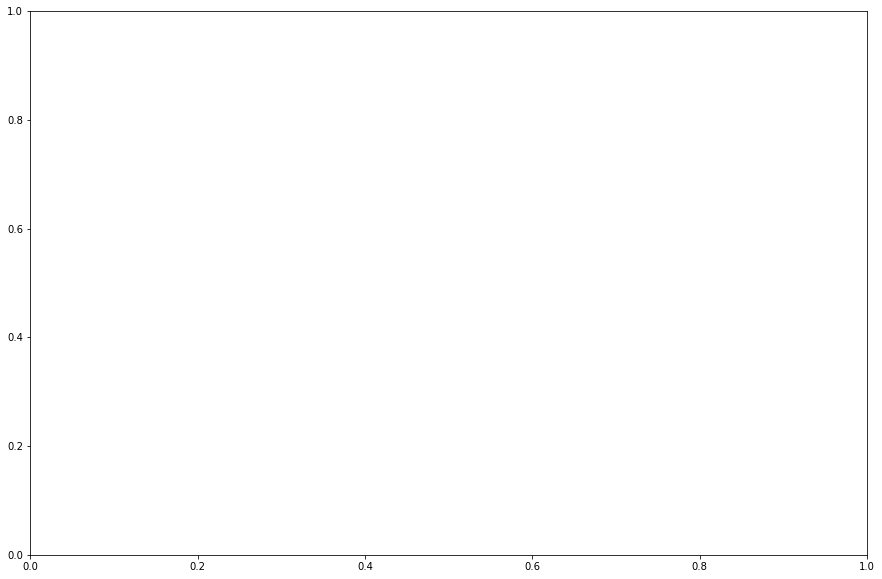

In [117]:
def plot_wavelet(time, signal, scales, waveletname='cmor1.5-1.0', cmap=plt.cm.seismic, title='Wavelet Transform (Power Spectrum) of signal', ylabel='Period (years)', xlabel='Time', figname=None):
    dt = time[1] - time[0]
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients)) ** 2
    period = 1. / frequencies

    scale0 = 8
    numlevels = 10

    levels = [scale0]
    for ll in range(1, numlevels):
        scale0 *= 2
        levels.append(scale0)

    contourlevels = np.log2(levels)
    fig, ax = plt.subplots(figsize=(15, 10))
    im = ax.contourf(time, np.log2(period), np.log2(power),
                     contourlevels, extend='both', cmap=cmap)
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    yticks = 2**np.arange(np.ceil(np.log2(period.min())),
                          np.ceil(np.log2(period.max())))
    ax.set_yticks(np.log2(yticks))
    ax.set_yticklabels(yticks)
    ax.invert_yaxis()
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], -1)
    cbar_ax = fig.add_axes([0.95, 0.15, 0.03, 0.7])
    fig.colorbar(im, cax=cbar_ax, orientation="vertical")
    if not figname:
        plt.plot('wavelet_{}.png'.format(waveletname),
                    dpi=300, bbox_inches='tight')
    else:
        plt.plot(figname, dpi=300, bbox_inches='tight')
    plt.close('all')

plot_wavelet(time, Ex, scales)


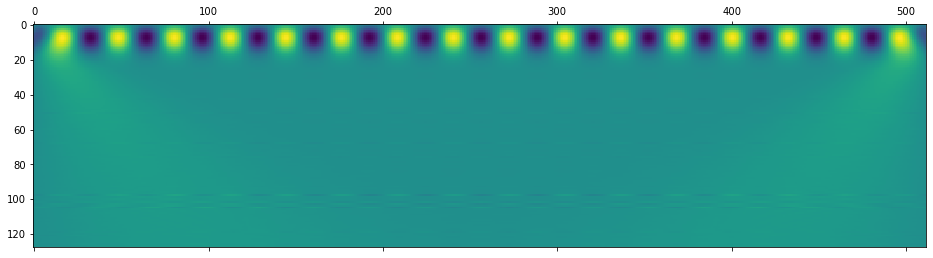

In [149]:
x = np.arange(512)
y = np.sin(2*np.pi*x/32)
coef, freqs=pywt.cwt(y,np.arange(1,129),'gaus1')
plt.matshow(coef) # doctest: +SKIP
plt.show() # doctest: +SKIP